<a href="https://colab.research.google.com/github/mileslilly2/code_for_whatever_you_are/blob/main/econ_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ──────────────────────────────────────────────────────────────────────────────
#  QUICK ECONOMETRICS & VISUALIZATION PRIMER (R / COLAB)
#  Dataset: USDA ERS County-level Unemployment & Income (2000-2023)
#  Focus: West Virginia counties
#  Source: USDA Economic Research Service                                             (see citation)
# ──────────────────────────────────────────────────────────────────────────────
# 1. Setup – install once per session
install.packages(c("tidyverse", "fixest",
  "sf"), repos = "https://cloud.r-project.org")



Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘zoo’, ‘Formula’, ‘e1071’, ‘wk’, ‘numDeriv’, ‘sandwich’, ‘dreamerr’, ‘stringmagic’, ‘classInt’, ‘s2’, ‘units’




In [ ]:
# 2. Libraries
library(tidyverse)   # dplyr, ggplot2, readr, etc.
library(fixest)      # fast, modern econometrics (feols)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:

# 3. Download & read the CSV
url  <- "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Unemployment2023.csv?v=84954"
temp <- tempfile(fileext = ".csv")
download.file(url, temp, mode = "wb")
ers  <- read_csv(temp, show_col_types = FALSE)



In [ ]:
ers

FIPS_Code,State,Area_Name,Attribute,Value
<dbl>,<chr>,<chr>,<chr>,<dbl>
0,US,United States,Civilian_labor_force_2000,142601576.0
0,US,United States,Employed_2000,136904853.0
0,US,United States,Unemployed_2000,5696723.0
0,US,United States,Unemployment_rate_2000,4.0
0,US,United States,Civilian_labor_force_2001,143786537.0
0,US,United States,Employed_2001,136977996.0
0,US,United States,Unemployed_2001,6808541.0
0,US,United States,Unemployment_rate_2001,4.7
0,US,United States,Civilian_labor_force_2002,144839298.0


In [ ]:

unique(ers$Attribute)


[1] "Civilian_labor_force_2000"                
  [2] "Employed_2000"                            
  [3] "Unemployed_2000"                          
  [4] "Unemployment_rate_2000"                   
  [5] "Civilian_labor_force_2001"                
  [6] "Employed_2001"                            
  [7] "Unemployed_2001"                          
  [8] "Unemployment_rate_2001"                   
  [9] "Civilian_labor_force_2002"                
 [10] "Employed_2002"                            
 [11] "Unemployed_2002"                          
 [12] "Unemployment_rate_2002"                   
 [13] "Civilian_labor_force_2003"                
 [14] "Employed_2003"                            
 [15] "Unemployed_2003"                          
 [16] "Unemployment_rate_2003"                   
 [17] "Civilian_labor_force_2004"                
 [18] "Employed_2004"                            
 [19] "Unemployed_2004"                          
 [20] "Unemployment_rate_2004"                   
 [21] "Civilian_labor_force_2005"                
 [22] "Employed_2005"                            
 [23] "Unemployed_2005"                          
 [24] "Unemployment_rate_2005"                   
 [25] "Civilian_labor_force_2006"                
 [26] "Employed_2006"                            
 [27] "Unemployed_2006"                          
 [28] "Unemployment_rate_2006"                   
 [29] "Civilian_labor_force_2007"                
 [30] "Employed_2007"                            
 [31] "Unemployed_2007"                          
 [32] "Unemployment_rate_2007"                   
 [33] "Civilian_labor_force_2008"                
 [34] "Employed_2008"                            
 [35] "Unemployed_2008"                          
 [36] "Unemployment_rate_2008"                   
 [37] "Civilian_labor_force_2009"                
 [38] "Employed_2009"                            
 [39] "Unemployed_2009"                          
 [40] "Unemployment_rate_2009"                   
 [41] "Civilian_labor_force_2010"                
 [42] "Employed_2010"                            
 [43] "Unemployed_2010"                          
 [44] "Unemployment_rate_2010"                   
 [45] "Civilian_labor_force_2011"                
 [46] "Employed_2011"                            
 [47] "Unemployed_2011"                          
 [48] "Unemployment_rate_2011"                   
 [49] "Civilian_labor_force_2012"                
 [50] "Employed_2012"                            
 [51] "Unemployed_2012"                          
 [52] "Unemployment_rate_2012"                   
 [53] "Civilian_labor_force_2013"                
 [54] "Employed_2013"                            
 [55] "Unemployed_2013"                          
 [56] "Unemployment_rate_2013"                   
 [57] "Civilian_labor_force_2014"                
 [58] "Employed_2014"                            
 [59] "Unemployed_2014"                          
 [60] "Unemployment_rate_2014"                   
 [61] "Civilian_labor_force_2015"                
 [62] "Employed_2015"                            
 [63] "Unemployed_2015"                          
 [64] "Unemployment_rate_2015"                   
 [65] "Civilian_labor_force_2016"                
 [66] "Employed_2016"                            
 [67] "Unemployed_2016"                          
 [68] "Unemployment_rate_2016"                   
 [69] "Civilian_labor_force_2017"                
 [70] "Employed_2017"                            
 [71] "Unemployed_2017"                          
 [72] "Unemployment_rate_2017"                   
 [73] "Civilian_labor_force_2018"                
 [74] "Employed_2018"                            
 [75] "Unemployed_2018"                          
 [76] "Unemployment_rate_2018"                   
 [77] "Civilian_labor_force_2019"                
 [78] "Employed_2019"                            
 [79] "Unemployed_2019"                          
 [80] "Unemployment_rate_2019"                   
 [

In [ ]:


ers_wv <- ers %>%
  filter(State == "WV",
         str_detect(Attribute, "^(Unemployment_rate|Employed|Unemployed|Civilian_labor_force)_")) %>%
  mutate(
    Year = as.integer(str_extract(Attribute, "\\d{4}$")),
    Variable = str_remove(Attribute, "_\\d{4}$"),
    FIPS = as.character(FIPS_Code),
    County = Area_Name
  ) %>%
  select(FIPS, County, Year, Variable, Value) %>%
  pivot_wider(names_from = Variable, values_from = Value) %>%
  rename(
    UnempRate = Unemployment_rate,
    LaborForce = Civilian_labor_force
  )


In [ ]:
ers_wv

FIPS,County,Year,LaborForce,Employed,Unemployed,UnempRate
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
54000,West Virginia,2000,799081,754457,44624,5.6
54000,West Virginia,2001,796596,753657,42939,5.4
54000,West Virginia,2002,798709,747040,51669,6.5
54000,West Virginia,2003,791841,739896,51945,6.6
54000,West Virginia,2004,789527,743989,45538,5.8
54000,West Virginia,2005,794557,751202,43355,5.5
54000,West Virginia,2006,804910,763325,41585,5.2
54000,West Virginia,2007,804305,765517,38788,4.8
54000,West Virginia,2008,806254,768294,37960,4.7


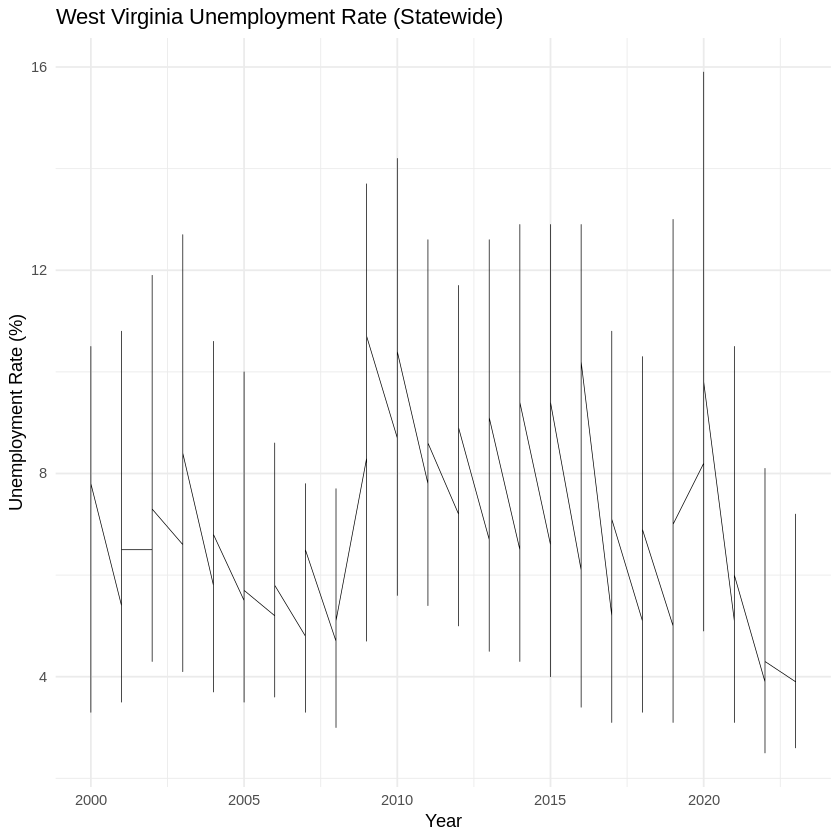

In [ ]:

ggplot(ers_wv, aes(x = Year, y = UnempRate)) +
  geom_line(linewidth = .2) +
  labs(
    title = "West Virginia Unemployment Rate (Statewide)",
    x     = "Year",
    y     = "Unemployment Rate (%)"
  ) +
  theme_minimal()

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


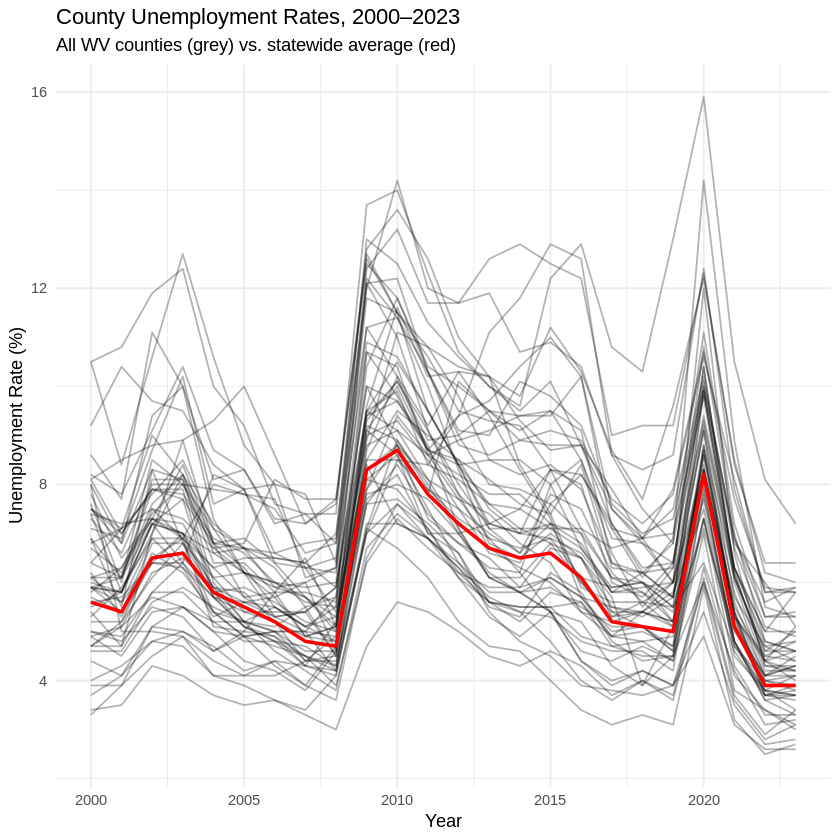

In [ ]:

ggplot(ers_wv, aes(x = Year, y = UnempRate, group = County)) +
  geom_line(alpha = 0.3) +
  geom_line(data = ers_wv %>% filter(County == "West Virginia"),
            aes(x = Year, y = UnempRate), color = "red", size = 1) +
  labs(title = "County Unemployment Rates, 2000–2023",
       subtitle = "All WV counties (grey) vs. statewide average (red)",
       y = "Unemployment Rate (%)") +
  theme_minimal()


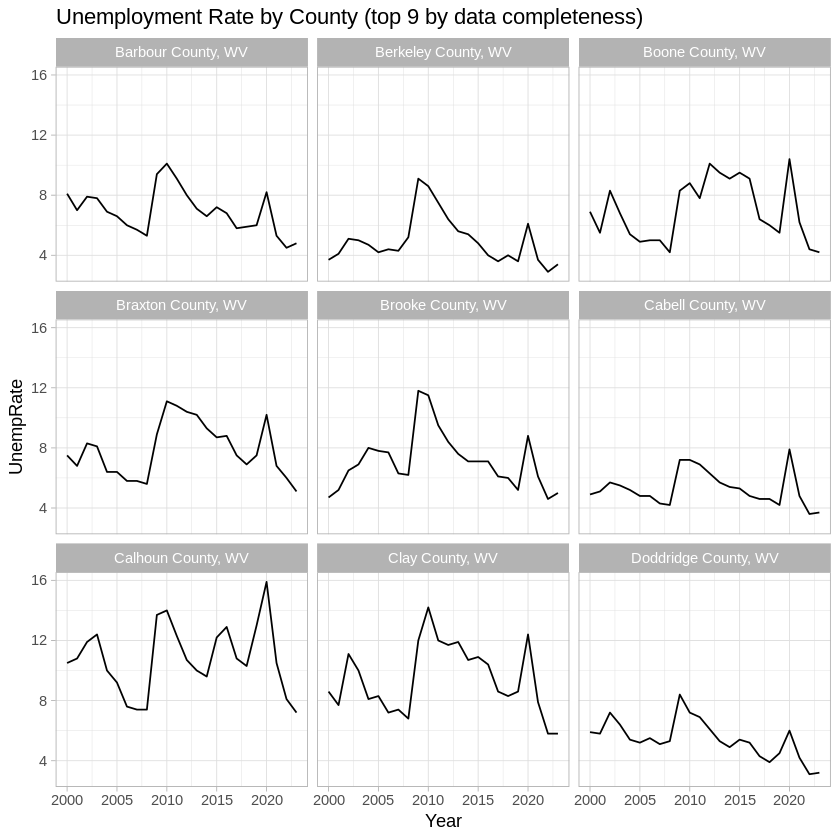

In [ ]:
selected <- ers_wv %>%
  count(County, sort = TRUE) %>%
  slice_head(n = 9) %>%
  pull(County)

ggplot(ers_wv %>% filter(County %in% selected),
       aes(Year, UnempRate)) +
  geom_line() +
  facet_wrap(~ County, ncol = 3) +
  theme_light() +
  labs(title = "Unemployment Rate by County (top 9 by data completeness)")


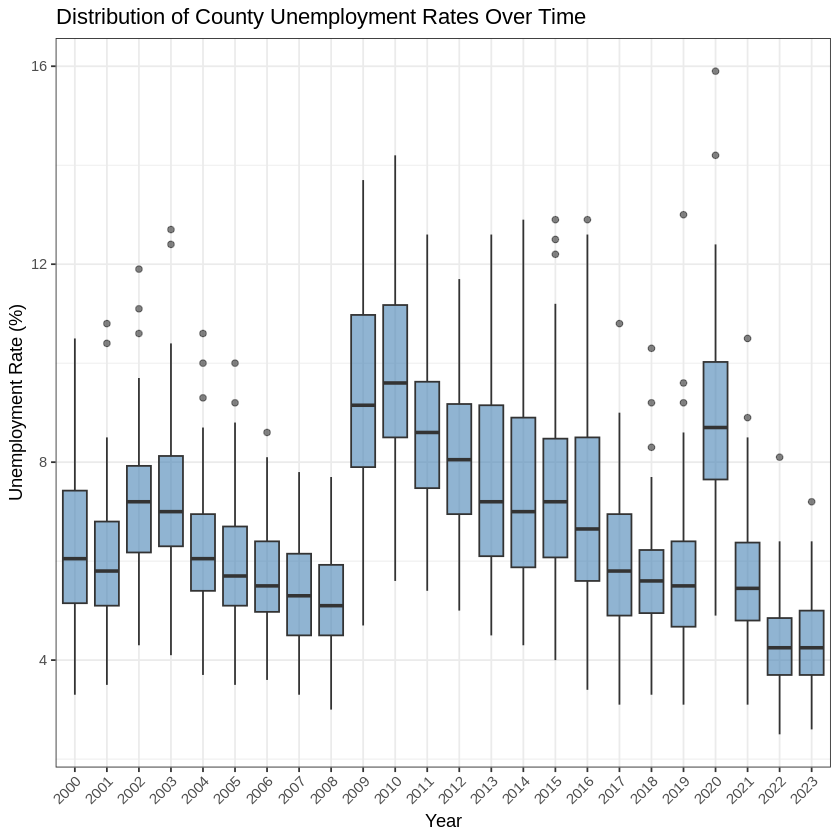

In [ ]:
ggplot(ers_wv, aes(factor(Year), UnempRate)) +
  geom_boxplot(fill = "steelblue", alpha = 0.6) +
  labs(x = "Year", y = "Unemployment Rate (%)",
       title = "Distribution of County Unemployment Rates Over Time") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


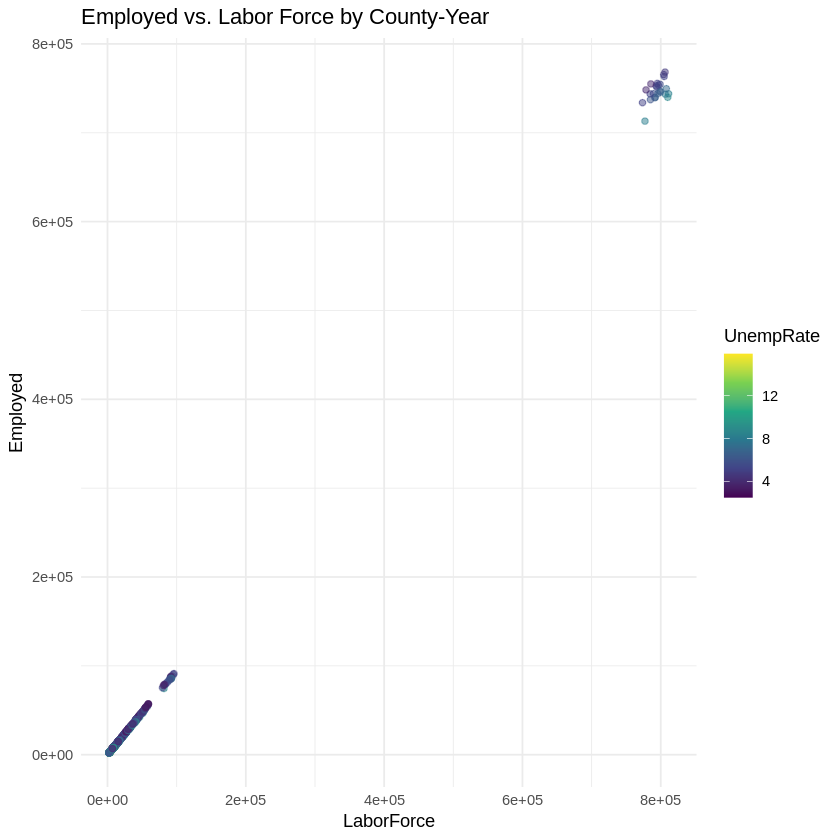

In [ ]:
ggplot(ers_wv, aes(x = LaborForce, y = Employed, color = UnempRate)) +
  geom_point(alpha = 0.5) +
  scale_color_viridis_c(name = "UnempRate") +
  labs(title = "Employed vs. Labor Force by County-Year") +
  theme_minimal()


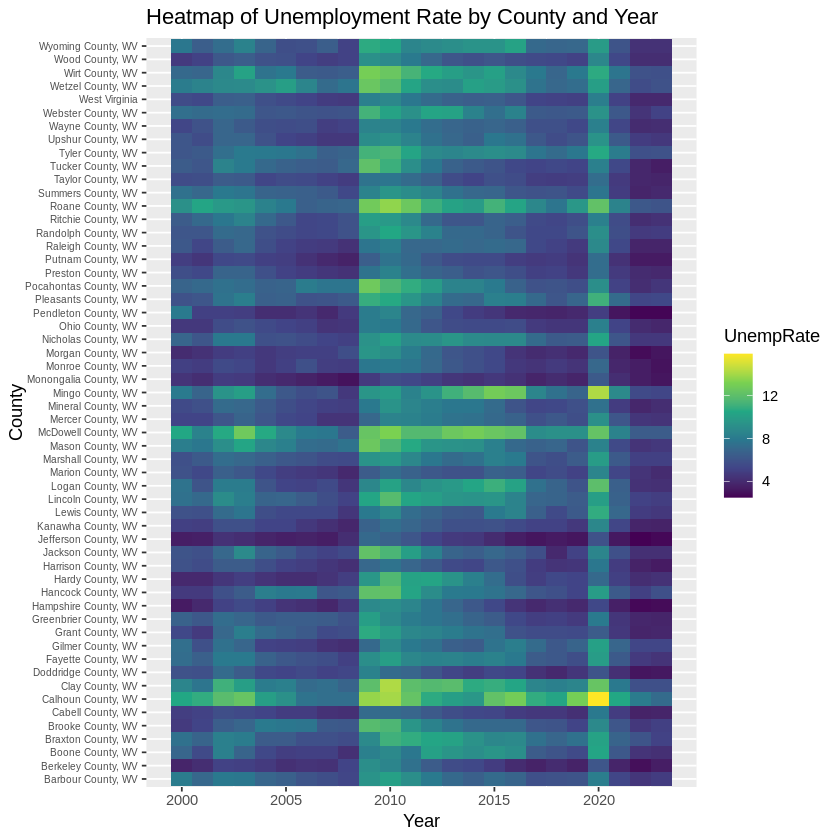

In [ ]:
ggplot(ers_wv, aes(x = Year, y = County, fill = UnempRate)) +
  geom_tile() +
  scale_fill_viridis_c(name = "UnempRate") +
  labs(title = "Heatmap of Unemployment Rate by County and Year") +
  theme(axis.text.y = element_text(size = 6))


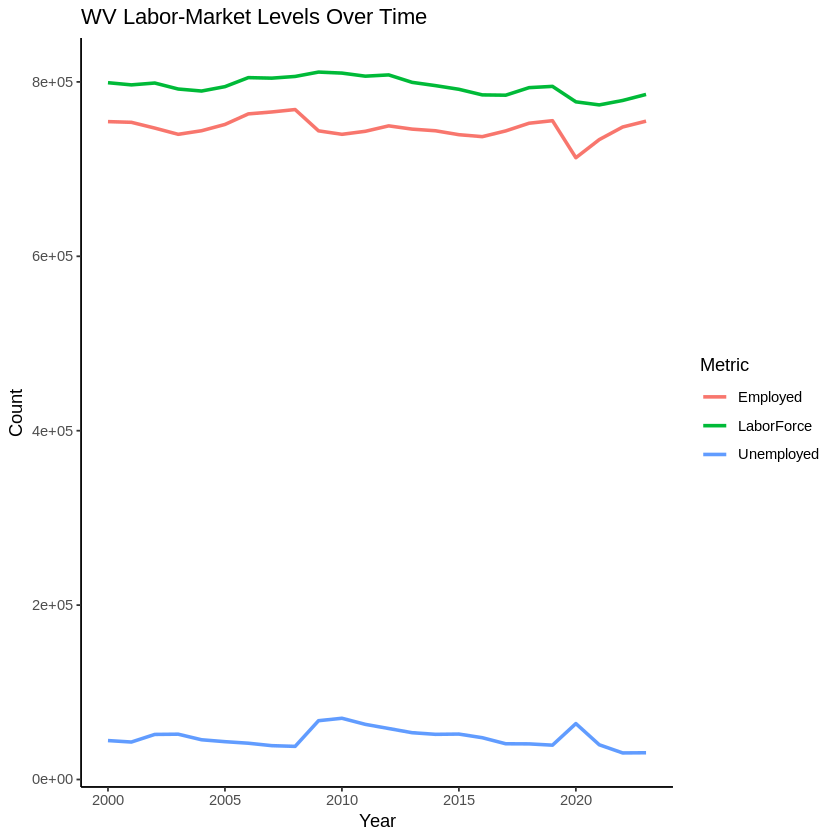

In [ ]:
ers_long <- ers_wv %>%
  pivot_longer(c(LaborForce, Employed, Unemployed),
               names_to = "Metric", values_to = "Count")

ggplot(ers_long %>% filter(County == "West Virginia"),
       aes(Year, Count, color = Metric)) +
  geom_line(size = 1) +
  labs(title = "WV Labor-Market Levels Over Time",
       y = "Count") +
  theme_classic()


In [ ]:
names(ers_wv)


[1] "FIPS"       "County"     "Year"       "LaborForce" "Employed"  
[6] "Unemployed" "UnempRate"

In [ ]:
library(fixest)

model_fe <- feols(UnempRate ~ LaborForce | County + Year, data = ers_wv)
summary(model_fe, cluster = ~County)


OLS estimation, Dep. Var.: UnempRate
Observations: 1,344
Fixed-effects: County: 56,  Year: 24
Standard-errors: Clustered (County) 
           Estimate Std. Error  t value Pr(>|t|)    
LaborForce -4.5e-05    2.1e-05 -2.15809 0.035303 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.812048     Adj. R2: 0.850405
                 Within R2: 0.012148